In [251]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [252]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [253]:
sns.set()

In [254]:
# Load Iris dataset from sklearn
data = datasets.load_iris()

In [255]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [256]:
print(data['target_names'][0:5])

['setosa' 'versicolor' 'virginica']


In [257]:
print(data['data'][0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [258]:
print(data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## **Using sepal length, sepal width, petal length, and petal width to classify the flowers**

In [259]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [260]:
df['target']=data['target']

In [261]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [262]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [263]:
# Visualize individual feature distributions

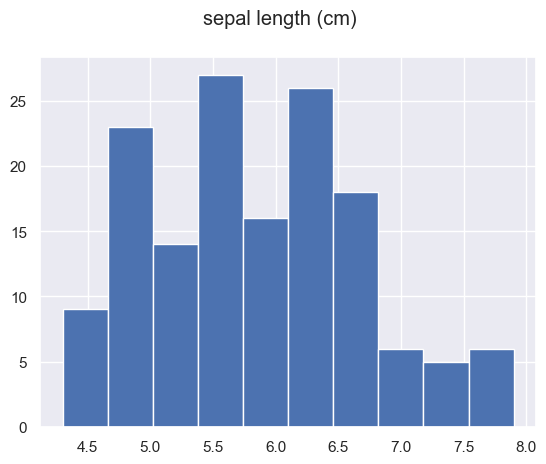

In [264]:
col ='sepal length (cm)'
df[col].hist()
plt.suptitle(col)  #Give title
plt.show()

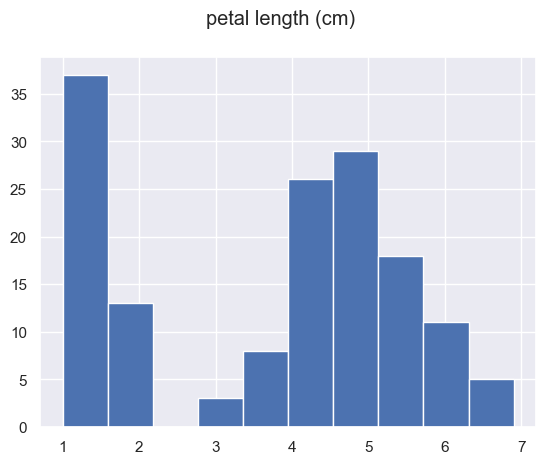

In [265]:
col ='petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

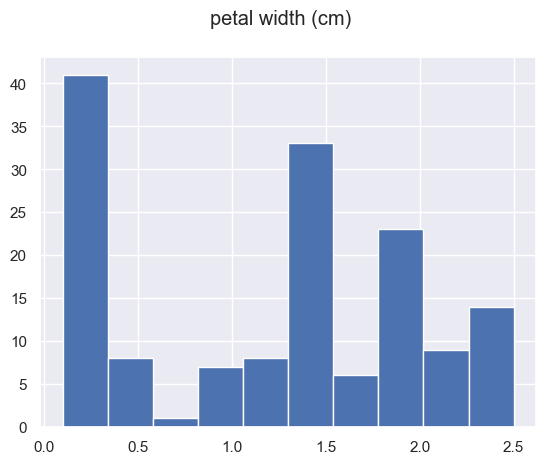

In [266]:
col ='petal width (cm)'
df[col].hist()
plt.suptitle(col,y=0.98)
plt.show()

In [267]:
df['target_name']=df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})   #maping 0,1,2 to there respective names

In [268]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [269]:
# Visualize relationships between features and target

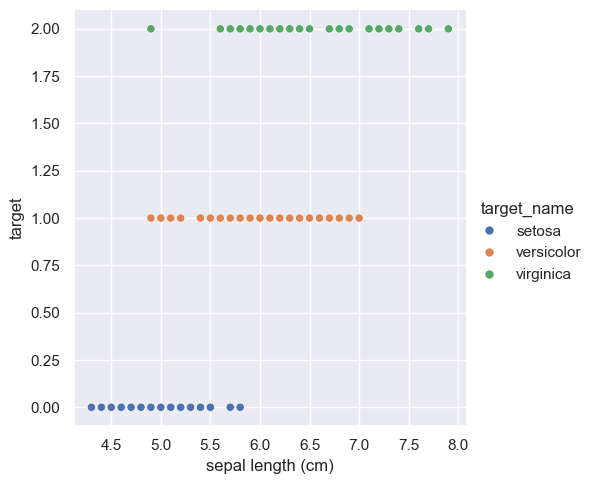

In [270]:
#Relationship of data with target
col ='sepal length (cm)'
sns.relplot(x=col,y='target',hue='target_name',data=df) 
plt.show()

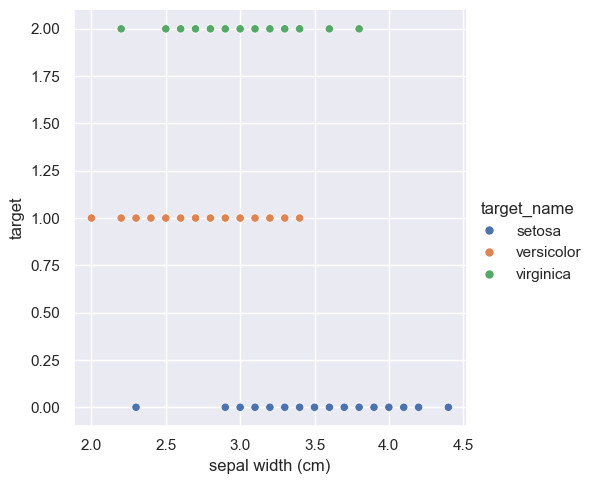

In [271]:
#Relationship of data with target
col ='sepal width (cm)'
sns.relplot(x=col,y='target',hue='target_name',data=df) 
plt.show()

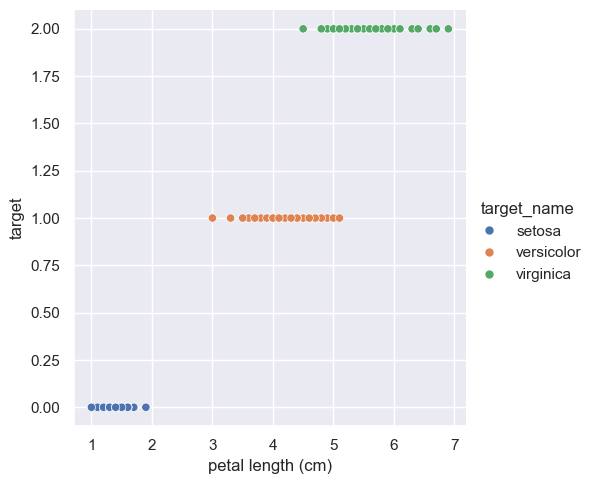

In [272]:
#Relationship of data with target
col ='petal length (cm)'
sns.relplot(x=col,y='target',hue='target_name',data=df) 
plt.show()

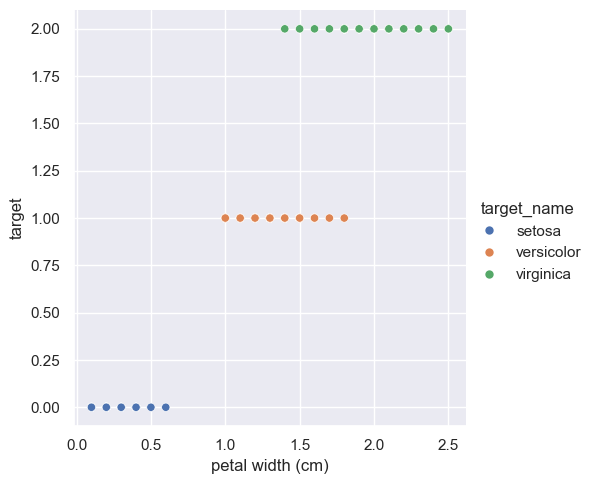

In [273]:
#Relationship of data with target
col ='petal width (cm)'
sns.relplot(x=col,y='target',hue='target_name',data=df) 
plt.show()

In [274]:
#Pairplots Exploratory data anaysis

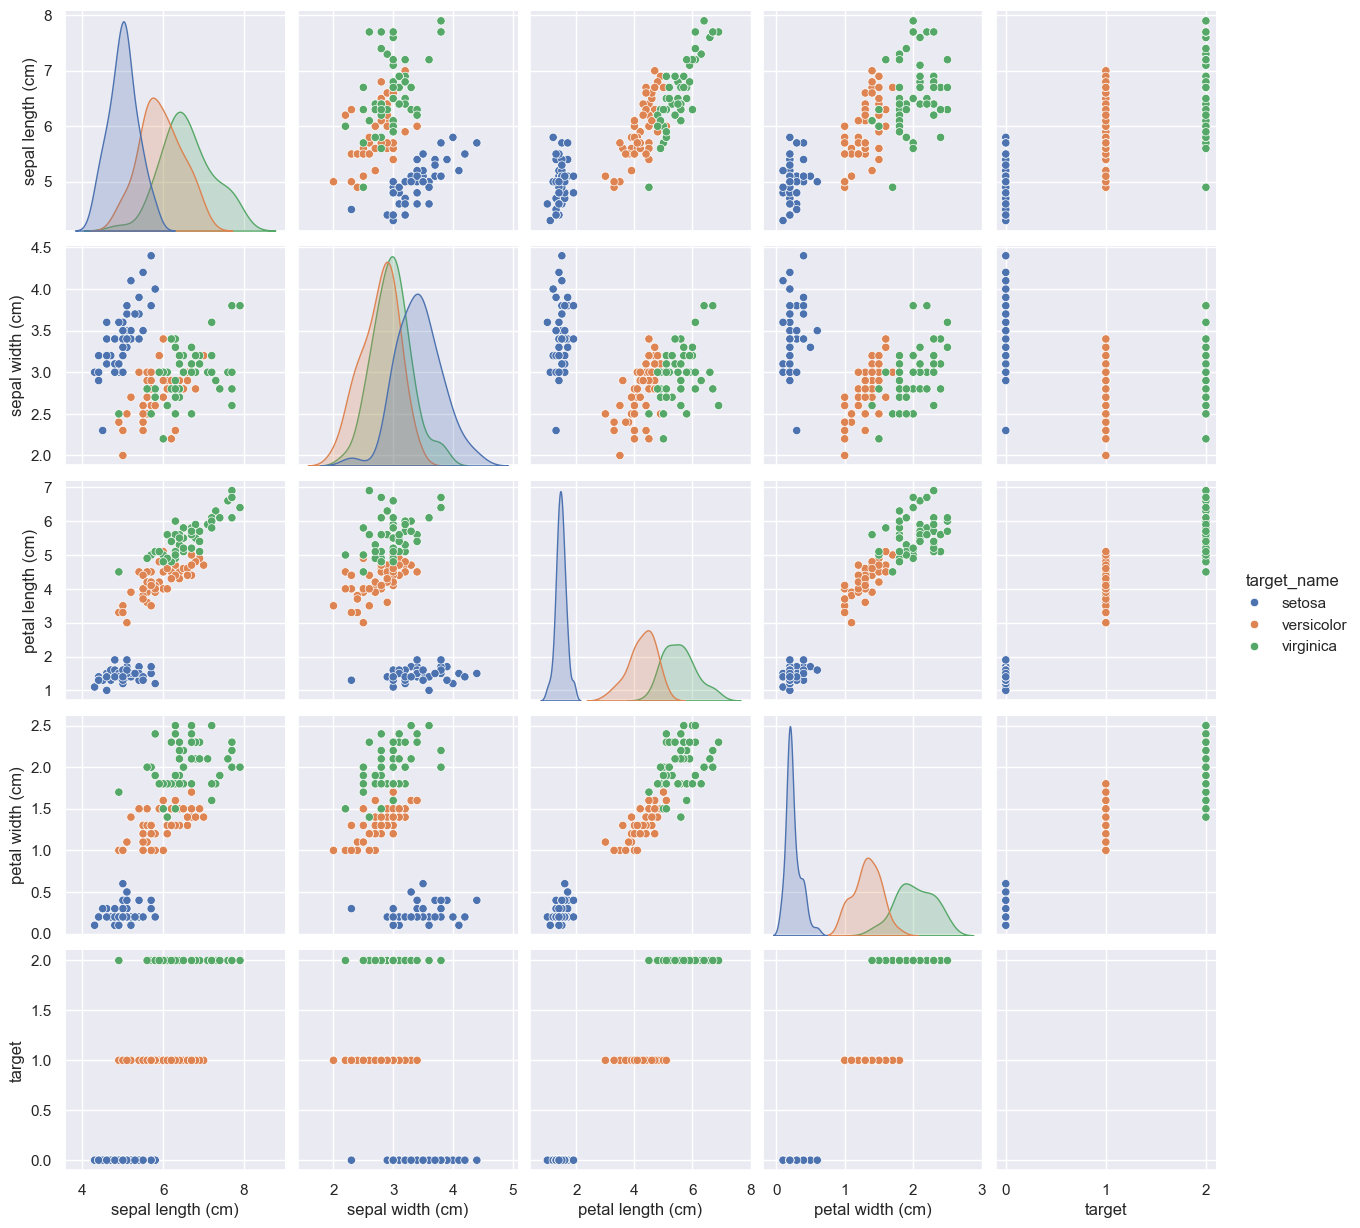

In [275]:
sns.pairplot(df, hue='target_name')
plt.show()

In [276]:
#Split the train data

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
df_train,df_test= train_test_split(df,test_size=0.25)

In [279]:
df_train.shape

(112, 6)

In [280]:
df_test.shape

(38, 6)

In [281]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
47,4.6,3.2,1.4,0.2,0,setosa
25,5.0,3.0,1.6,0.2,0,setosa
77,6.7,3.0,5.0,1.7,1,versicolor
42,4.4,3.2,1.3,0.2,0,setosa
72,6.3,2.5,4.9,1.5,1,versicolor


In [282]:
#We will split the data into plain numpy arrays for modeling

In [283]:
#Convertomg the resulting DataFrame into a NumPy array.
x_train= df_train.drop(columns=['target','target_name']).values #remove target and target name
y_train=df_train["target"].values

In [284]:
x_train

array([[4.6, 3.2, 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [6.7, 3. , 5. , 1.7],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [4.8, 3. , 1.4, 0.1],
       [5. , 3.4, 1.6, 0.4],
       [5.1, 3.7, 1.5, 0.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.7, 3. , 5.2, 2.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [7.7, 3. , 6.1, 2.3],
       [6.1, 3. , 4.6, 1.4],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.6, 4. , 1.2],
       [7.2, 3.6, 6.1, 2.5],
       [5.1, 3.5, 1.4, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [6.4, 2.9, 4.3, 1.3],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.7, 4.9, 1.8],
       [5.4, 3.7, 1.5, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6.7, 2

In [285]:
y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       2, 1])

In [286]:
#Manually cutoff points for classifcation

In [287]:
def single_feature_prediction(petal_length): #using petal length predicts the iris 
    if petal_length <2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [288]:
x_train[:,2] #petal length

array([1.4, 1.6, 5. , 1.3, 4.9, 1.4, 1.6, 1.5, 4.2, 5.2, 3.6, 3.9, 5.3,
       1.2, 1.3, 4.5, 1.5, 5.4, 1.6, 1.5, 6.1, 4.6, 5.6, 4. , 6.1, 1.4,
       5.3, 4.3, 1.5, 4.9, 1.5, 4.1, 1. , 1.6, 5.8, 6.4, 1.7, 1.3, 4. ,
       3.5, 5.1, 5.5, 3.3, 5.9, 5.1, 4. , 1.9, 1.1, 6.7, 5.4, 5.9, 5.1,
       4.5, 3.5, 4.5, 5. , 1.6, 5.8, 4.9, 5.6, 1.4, 4.8, 5. , 4.4, 5.5,
       3.9, 1.4, 3.9, 5.1, 1.3, 4.8, 1.5, 1.7, 4.1, 4.8, 1.5, 5.7, 5.1,
       4.6, 4.7, 5.7, 1.9, 4. , 4.2, 4.9, 1.2, 5.8, 5.2, 4.4, 6.1, 4.7,
       4.1, 4.2, 1.5, 4.4, 1.4, 1.4, 3. , 5.1, 1.5, 1.6, 6.7, 4.5, 5.6,
       1.5, 4.6, 6. , 5.7, 1.6, 4.7, 6.6, 4.5])

In [289]:
y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [290]:
y_predictions

array([0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1,
       2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       2, 1])

In [291]:
manual_model_accuracy=np.mean(y_predictions == y_train)

In [292]:
print(f"Manual Model Accuracy: {manual_model_accuracy*100:.2f}%")

Manual Model Accuracy: 96.43%


In [293]:
from sklearn.linear_model import LogisticRegression #Modeling using logistic regression

In [294]:
model =LogisticRegression(max_iter=200)

In [295]:
xt,xv,yt,yv=train_test_split(x_train,y_train,test_size=0.25)

In [296]:
model.fit(xt,yt)

LogisticRegression(max_iter=200)

In [297]:
y_pred=model.predict(xv)

In [298]:
np.mean(y_pred==yv)

np.float64(1.0)

In [299]:
#Cross validation to evalute the model

In [300]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [301]:
accuracies=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')

In [302]:
np.mean(accuracies)

np.float64(0.9553359683794467)

In [303]:
y_pred=cross_val_predict(model,x_train,y_train,cv=5)

In [304]:
predicted_correctly_mask=y_pred==y_train

In [305]:
not_predicted_correctly=~predicted_correctly_mask

In [306]:
x_train[not_predicted_correctly]

array([[6.7, 3. , 5. , 1.7],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 2.2, 5. , 1.5],
       [5.9, 3.2, 4.8, 1.8]])

In [307]:
df_predictions=df_train.copy()

In [308]:
df_predictions["correct_prediction"]=predicted_correctly_mask

In [309]:
df_predictions["prediction"]=y_pred

In [310]:
df_predictions["prediction_label"]=df_predictions['prediction'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [311]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
47,4.6,3.2,1.4,0.2,0,setosa,True,0,setosa
25,5.0,3.0,1.6,0.2,0,setosa,True,0,setosa
77,6.7,3.0,5.0,1.7,1,versicolor,False,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa,True,0,setosa
72,6.3,2.5,4.9,1.5,1,versicolor,False,2,virginica


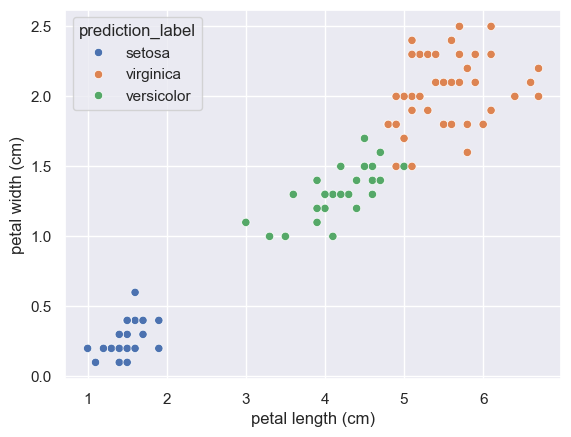

In [312]:
sns.scatterplot(x="petal length (cm)", y='petal width (cm)', data=df_predictions, hue='prediction_label')
plt.show() 

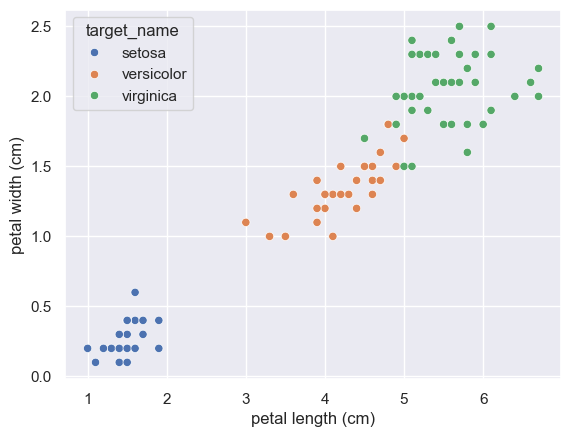

In [313]:
sns.scatterplot(x="petal length (cm)", y='petal width (cm)', data=df_predictions, hue='target_name')
plt.show() 

In [314]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])    
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[0].set_title("Predicted Labels")
    axs[1].set_title("Actual Target Labels")
    axs[2].set_title("Correct vs Incorrect")
    axs[3].set_visible(False)
    plt.tight_layout()
    plt.show()

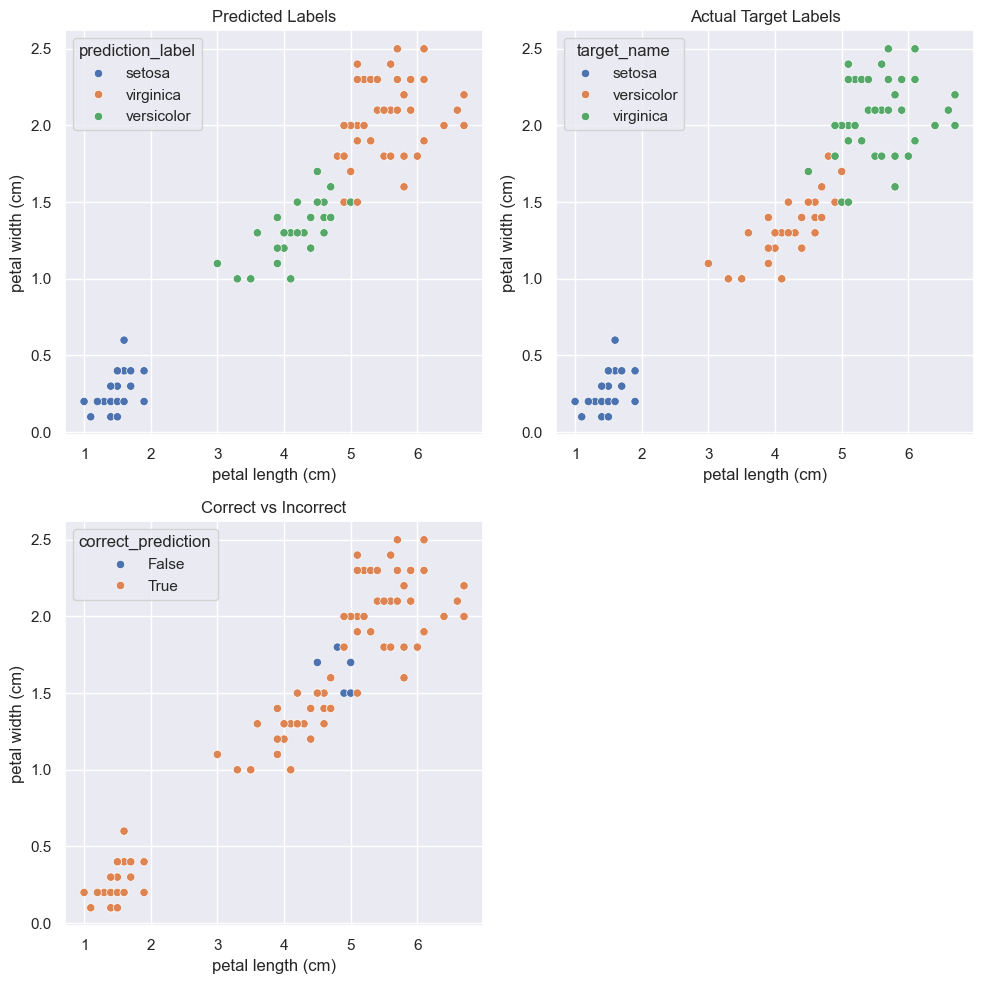

In [315]:
plot_incorrect_predictions(df_predictions,'petal length (cm)','petal width (cm)')

In [316]:
#Model Tuning is to determine the parameters of your model

In [317]:
for reg_param in (0.1,0.3,0.9,1,1.3,1.9,2,2.3,2.9,3):
    model=LogisticRegression(max_iter=200,C=reg_param)
    accuracies = cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
    print(f"Accuracy: {np.mean(accuracies)*100:.2f}%")

Accuracy: 92.81%
Accuracy: 94.62%
Accuracy: 95.53%
Accuracy: 95.53%
Accuracy: 95.53%
Accuracy: 95.53%
Accuracy: 95.53%
Accuracy: 95.53%
Accuracy: 95.53%
Accuracy: 95.53%


In [318]:
model=LogisticRegression(max_iter=200,C=2) #Final Model

In [319]:
x_test= df_test.drop(columns=['target','target_name']).values #remove target and target name
y_test=df_test["target"].values
x_test.shape

(38, 4)

In [320]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1])

In [321]:
model.fit(x_train,y_train)

LogisticRegression(C=2, max_iter=200)

In [322]:
y_test_pred=model.predict(x_test)

In [323]:
test_set_correctly_done=y_test_pred==y_test
test_set_accuracy=np.mean(test_set_correctly_done)

In [324]:
print(f"Test Set Accuracy: {np.mean(test_set_accuracy)*100:.2f}%")

Test Set Accuracy: 97.37%


In [325]:
test_set_correctly_done

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [326]:
df_predictions_test=df_test.copy()
df_predictions_test["correct_prediction"]=test_set_correctly_done
df_predictions_test["prediction"]=y_test_pred
df_predictions_test["prediction_label"]=df_predictions_test['prediction'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [327]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
40,5.0,3.5,1.3,0.3,0,setosa,True,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa,True,0,setosa
78,6.0,2.9,4.5,1.5,1,versicolor,True,1,versicolor
86,6.7,3.1,4.7,1.5,1,versicolor,True,1,versicolor
81,5.5,2.4,3.7,1.0,1,versicolor,True,1,versicolor


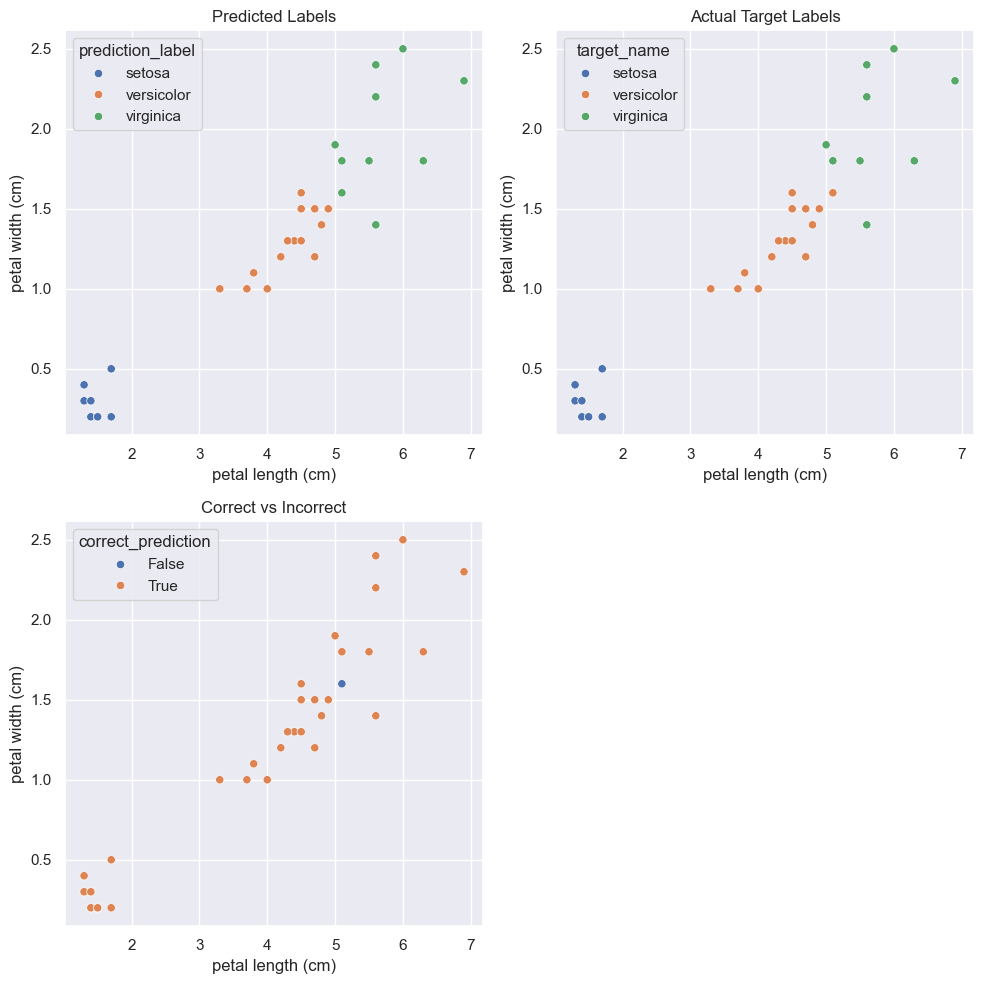

In [328]:
plot_incorrect_predictions(df_predictions_test,x_axis_feature="petal length (cm)",y_axis_feature="petal width (cm)")

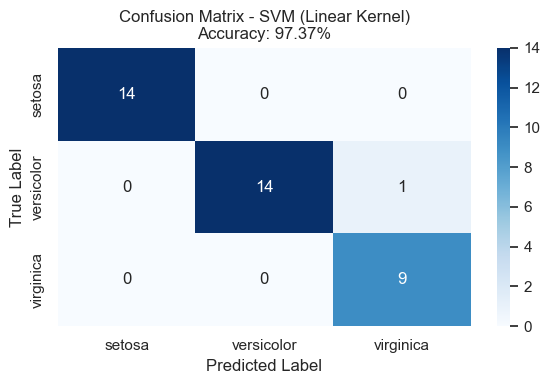

In [329]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index=['setosa', 'versicolor', 'virginica'],
                     columns=['setosa', 'versicolor', 'virginica'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Linear Kernel)\nAccuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
